In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
csv_path = "yulu_data.csv"
df = pd.read_csv(csv_path, delimiter=",")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
# Convert columns to appropriate data types for EDA

df['datetime'] = pd.to_datetime(df['datetime'])

categorical_columns = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_columns :
  df[col] = df[col].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [6]:
df.drop(columns=df.columns[0]).describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [7]:
# detecting missing values in the dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
min_datetime = df['datetime'].min()
max_datetime = df['datetime'].max()
print("Minimum datetime:", min_datetime)
print("Maximum datetime:", max_datetime)

# Number of unique values in each categorical column
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Minimum datetime: 2011-01-01 00:00:00
Maximum datetime: 2012-12-19 23:00:00

Column: season
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

Column: holiday
holiday
0    10575
1      311
Name: count, dtype: int64

Column: workingday
workingday
1    7412
0    3474
Name: count, dtype: int64

Column: weather
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


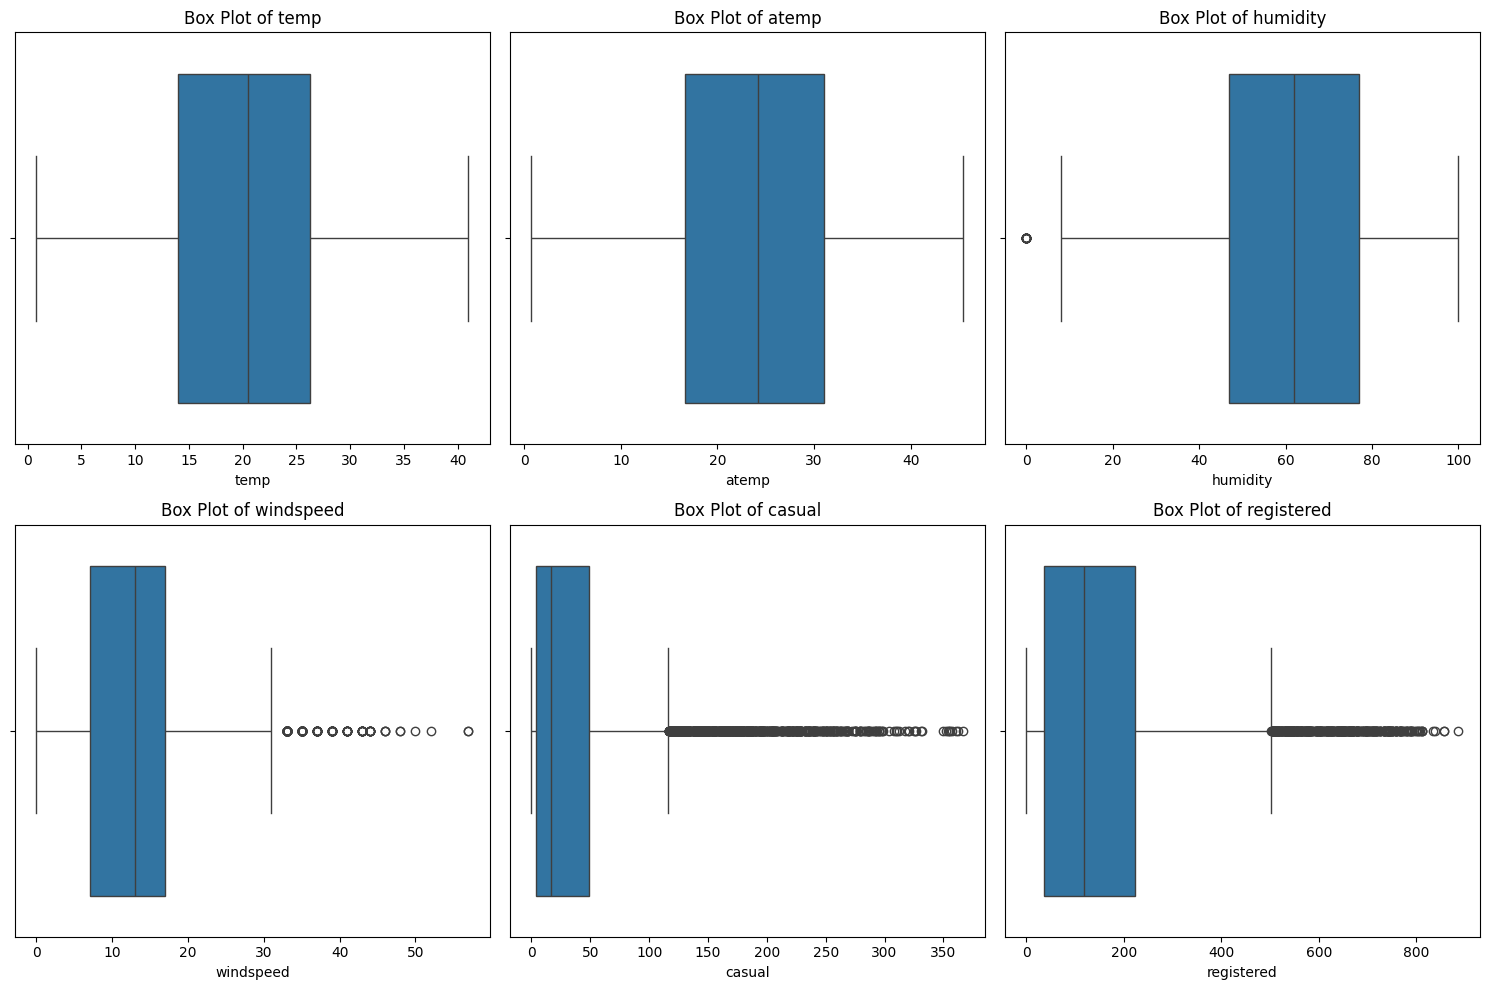

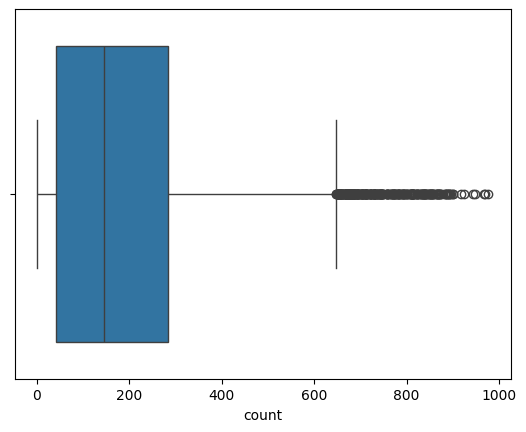

In [9]:
# Define numerical columns
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a 3x3 grid for box plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot box plots for each numerical column
for ax, col in zip(axes, numerical_columns[:-1]):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Box Plot of {col}')

# Show the figure
plt.tight_layout()
plt.show()

sns.boxplot(x=df[numerical_columns[-1]])
plt.show()

In [10]:
# Define a function to calculate outliers using IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identify outliers in 'casual' and 'registered' columns
casual_outliers = detect_outliers_iqr(df, 'casual')
registered_outliers = detect_outliers_iqr(df, 'registered')
count_outliers = detect_outliers_iqr(df, 'count')

print(f"Number of outliers in 'casual': {len(casual_outliers)}")
print(f"Number of outliers in 'registered': {len(registered_outliers)}")
print(f"Number of outliers in 'count': {len(count_outliers)}")

Number of outliers in 'casual': 749
Number of outliers in 'registered': 423
Number of outliers in 'count': 300


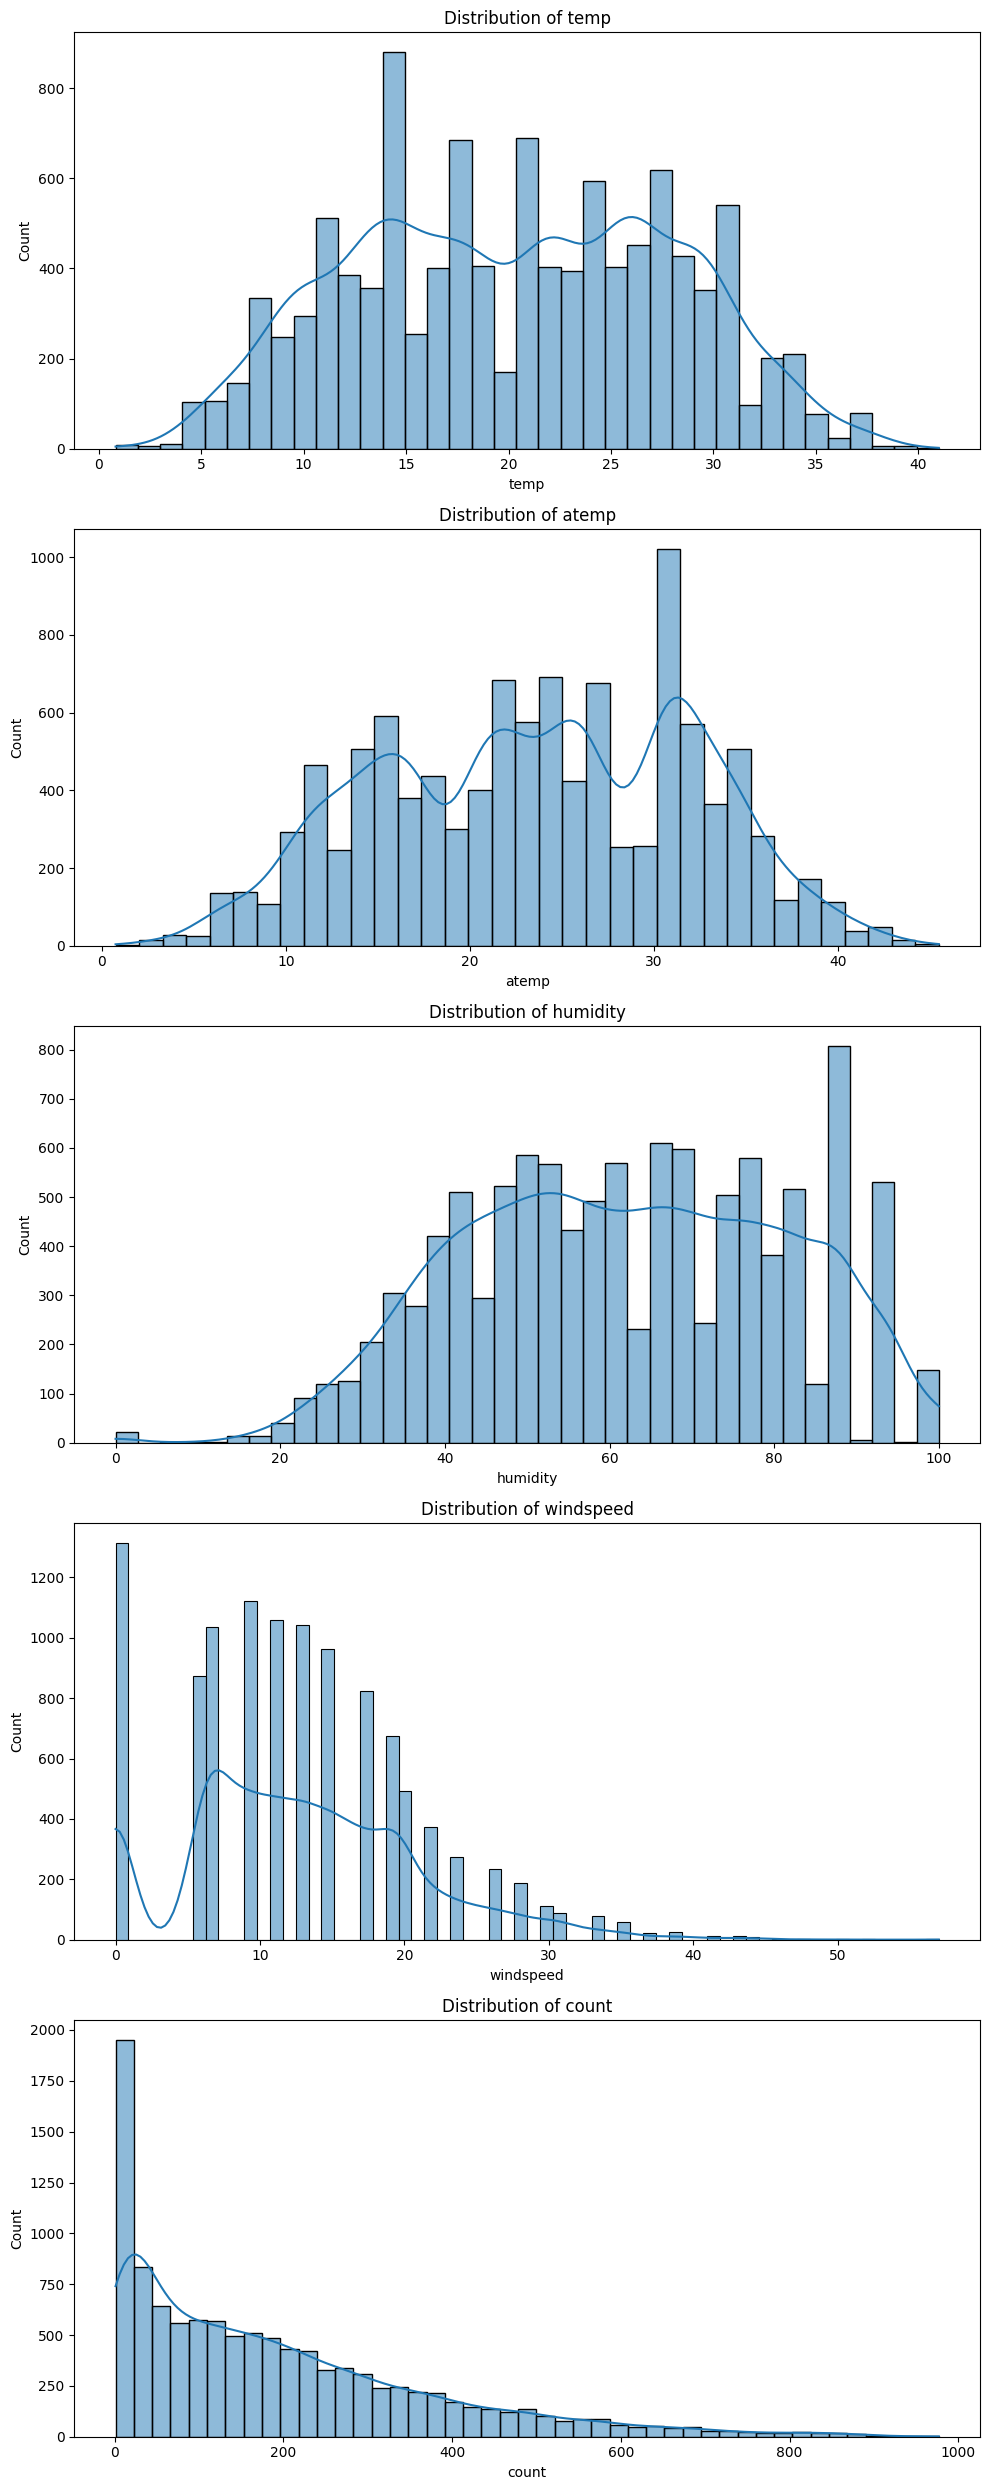

In [11]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(10, 25))
for i, var in enumerate(continuous_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

In [12]:
for var in continuous_vars:
    skewness = df[var].skew()
    mean = df[var].mean()
    median = df[var].median()
    print(f'{var}: Skewness={skewness}, Mean={mean}, Median={median}')

temp: Skewness=0.003690844422472008, Mean=20.23085981995223, Median=20.5
atemp: Skewness=-0.10255951346908665, Mean=23.655084052912, Median=24.24
humidity: Skewness=-0.08633518364548581, Mean=61.88645967297446, Median=62.0
windspeed: Skewness=0.5887665265853944, Mean=12.7993954069447, Median=12.998
count: Skewness=1.2420662117180776, Mean=191.57413191254824, Median=145.0




TEMP

* The skewness is very close to 0, indicating an almost perfectly symmetric distribution. The mean and median are also very close, further confirming a near-normal distribution.


ATEMP

* The skewness is slightly negative, close to 0, indicating a nearly symmetric distribution. The mean and median are also very close, indicating an almost normal distribution with a slight left skew.


COMMENT

* The distributions are fairly uniform, indicating a wide range of recorded temperatures.
Both variables show a fairly normal distribution with slight skewness.



HUMIDITY

* The skewness is slightly negative, close to 0, indicating a nearly symmetric distribution. The mean and median are also very close, indicating an almost normal distribution with a slight left skew.

COMMENT

* The distribution shows a peak around 50-70%, which is expected in many climates.
There are few instances of very low humidity and very high humidity.




WINDSPEED


* The windspeed data shows a noticeable right skew, with more values concentrated on the lower end and a few higher values extending the tail to the right. This is supported by the positive skewness value.

COMMENT

* High wind speeds are less frequent.



COUNT

* The count distribution is right-skewed, indicating that most rental counts are lower, with fewer instances of very high rentals.

COMMENT

* There are some days with very high rental counts.  This distribution suggests variability in rental counts, possibly due to varying factors like weather, season, and working days.

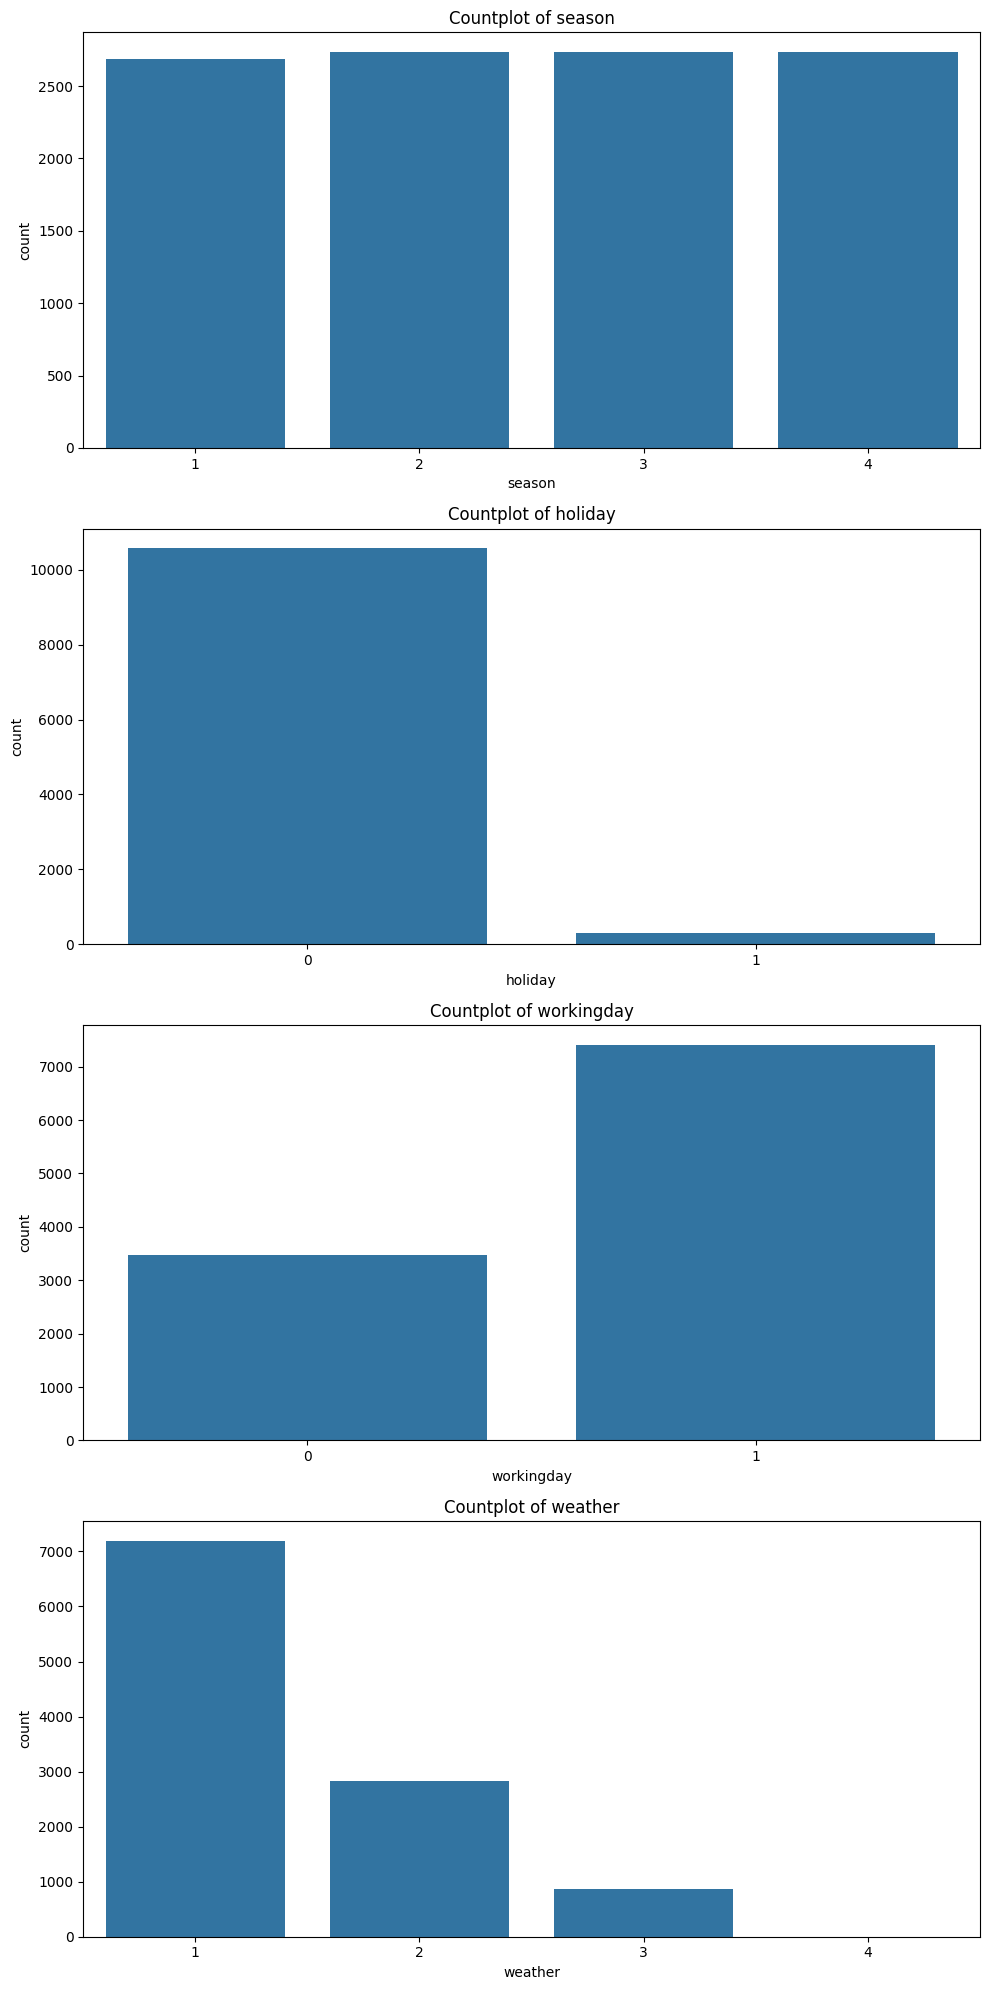

In [13]:
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(10, 20))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Countplot of {var}')
plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS

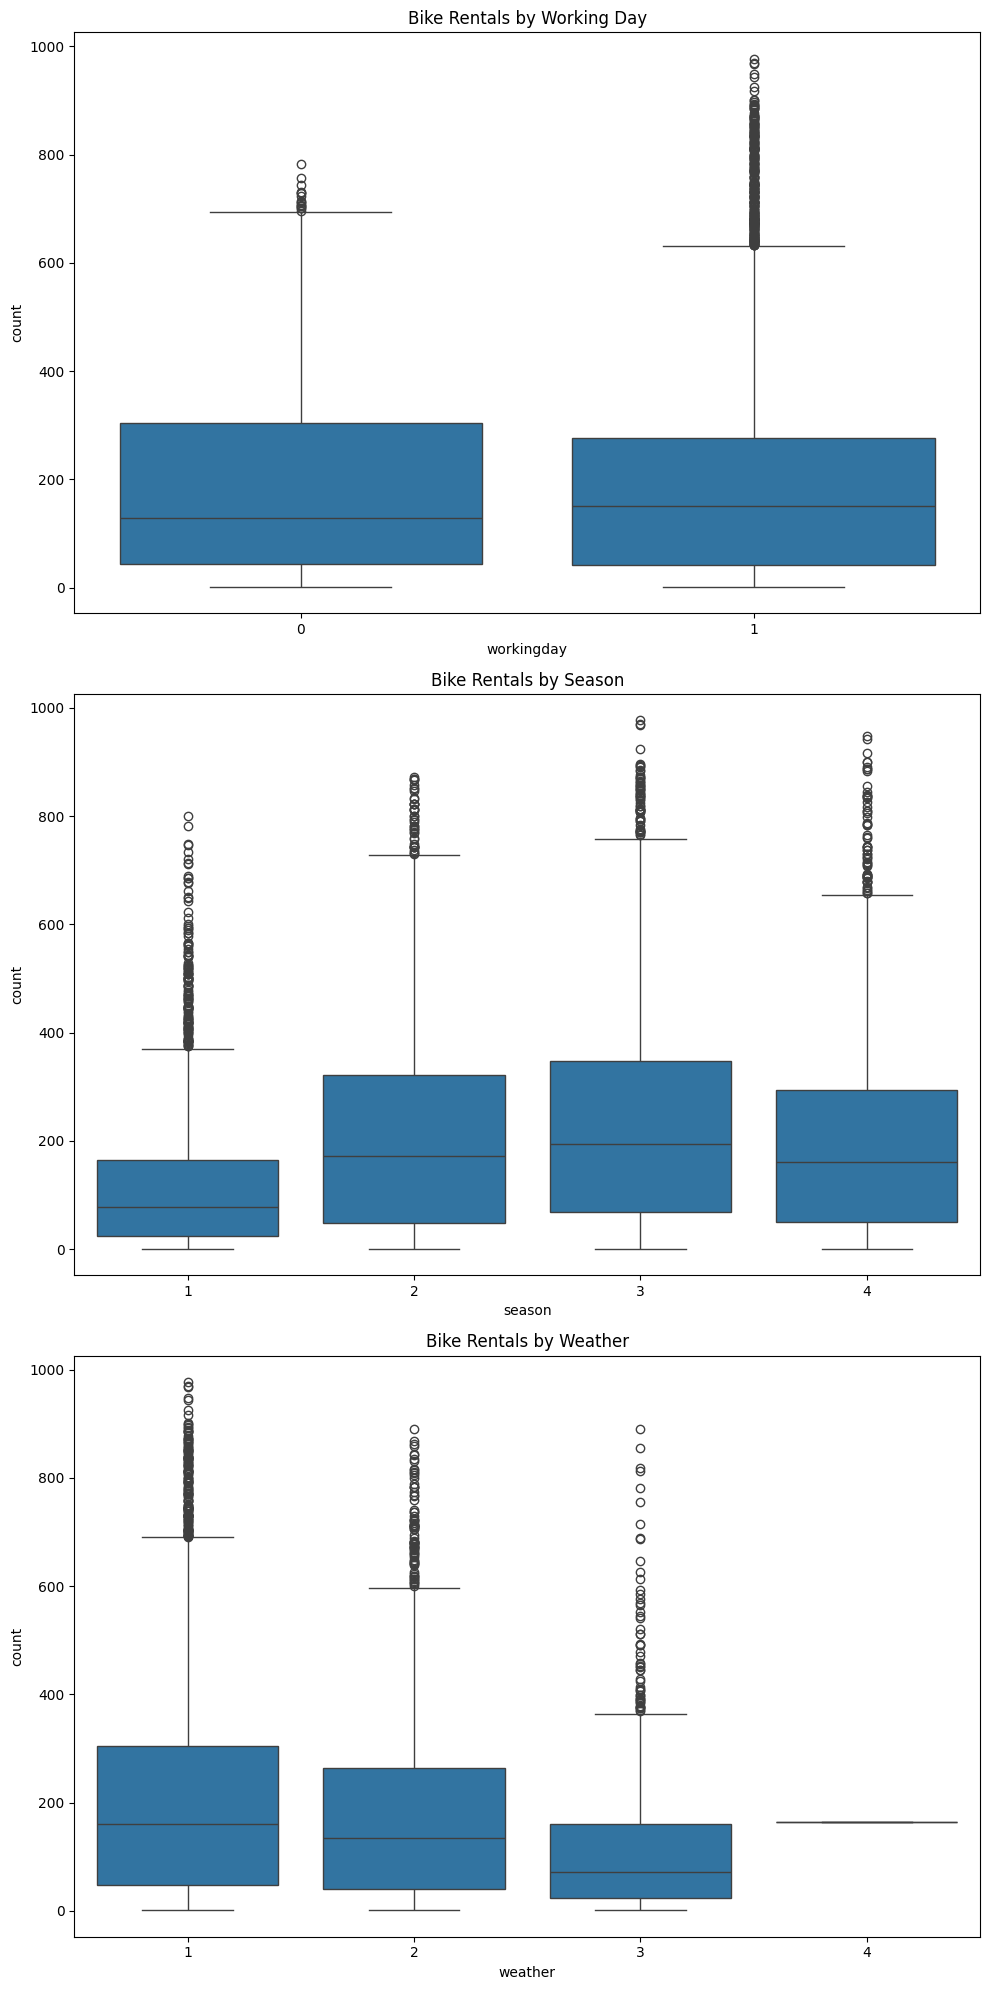

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

sns.boxplot(x='workingday', y='count', data=df, ax=axes[0])
axes[0].set_title('Bike Rentals by Working Day')

sns.boxplot(x='season', y='count', data=df, ax=axes[1])
axes[1].set_title('Bike Rentals by Season')

sns.boxplot(x='weather', y='count', data=df, ax=axes[2])
axes[2].set_title('Bike Rentals by Weather')

plt.tight_layout()
plt.show()


Bike Rentals by Working Day:

* The median count of bike rentals is higher on working days compared to non-working days.
The noticeable difference in bike rental behavior based on whether it is a working day or not suggests that people might be using it for commute to work.


Bike Rentals by Season:

* The highest median rentals occur in season 3 (fall), while season 1 (spring) has the lowest median rentals.
Seasonality affects bike rental counts significantly.


Bike Rentals by Weather:

* Bike rentals are highest in clear weather conditions with few clouds.  Mist + Cloudy weather still retains much of the demand.
Poor weather conditions (e.g., heavy rain, snow) lead to collapse in demand.


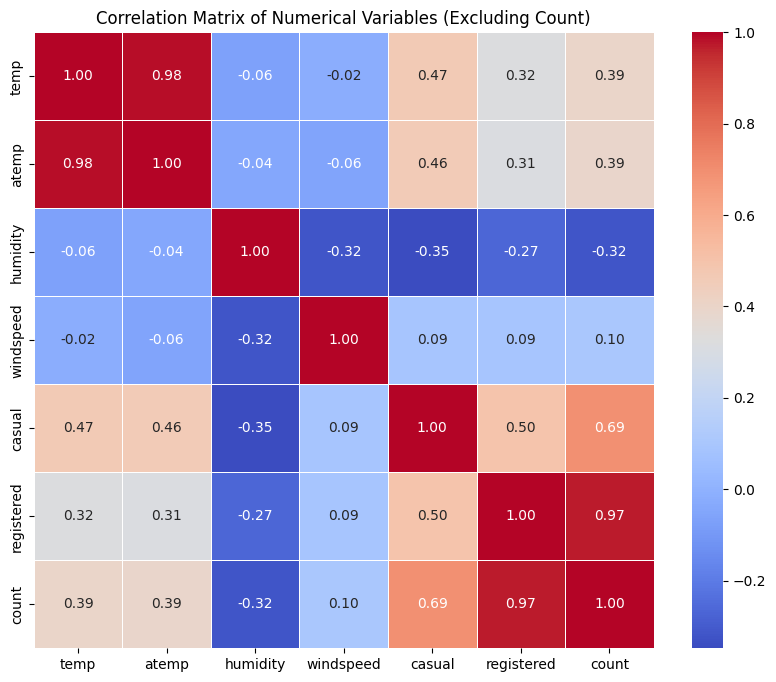

In [15]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix for numerical columns
numerical_corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables (Excluding Count)')
plt.show()

Interpretation of the correlation coefficients between the count variable and other numerical variables:

**temp and atemp**: Both temp and atemp have a positive correlation with count, with correlation coefficients of approximately 0.39. This suggests that as the temperature or apparent temperature increases, the number of electric cycles rented (count) tends to increase as well, although the correlation is moderate.

**humidity**: Humidity has a negative correlation with count, with a correlation coefficient of approximately -0.32. This suggests that as humidity increases, the number of electric cycles rented (count) tends to decrease. However, the correlation is not very strong.

**windspeed**: Windspeed has a weak positive correlation with count, with a correlation coefficient of approximately 0.10. This suggests that there is a slight tendency for the number of electric cycles rented (count) to increase with higher windspeed, but the correlation is quite weak.

**casual**: The variable casual has a strong positive correlation with count, with a correlation coefficient of approximately 0.69. This suggests that there is a strong positive relationship between the number of casual rentals and the total number of rentals (count).

**registered**: The variable registered has a very strong positive correlation with count, with a correlation coefficient of approximately 0.97. This indicates that there is an extremely strong positive relationship between the number of registered rentals and the total number of rentals (count).

# 1) Test for the Effect of Working Day on Number of Electric Cycles Rented

Significance Level (alpha): Typically set at 0.05.

1.   List item
2.   List item



2-Sample T-Test

The 2-sample T-test is used to determine if there is a significant difference between the means of two independent groups. Here, we will compare the mean number of electric cycles rented on working days versus non-working days.

Null Hypothesis (𝐻0):
The mean number of cycles rented on working days is equal to the mean number on non-working days.

Alternative Hypothesis (𝐻1):
The mean number of cycles rented on working days is different from the mean number on non-working days.

In [16]:

# Separate the data into two groups
working_day_rentals = df[df['workingday'] == 1]['count']
non_working_day_rentals = df[df['workingday'] == 0]['count']

# Perform the 2-sample T-test
t_stat, p_value = stats.ttest_ind(working_day_rentals, non_working_day_rentals)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 1.2096277376026694, P-value: 0.22644804226361348



INSIGHT

With a p-value of 0.226, which is greater than the significance level (typically 0.05), we fail to reject the null hypothesis. Therefore, we do not have enough evidence to conclude that there is a significant difference in the number of electric cycles rented between working days and non-working days at a 5% significance level.

# 2) Test for Differences in Number of Cycles Rented Across Weather conditions.


**ANOVA** (Analysis of Variance) is used to compare the means of three or more groups.
We will check if the number of cycles rented differs significantly across different weather conditions.

Null Hypothesis (𝐻0):
The mean number of cycles rented is the same across different weather conditions.

Alternative Hypothesis (𝐻1):
The mean number of cycles rented is different across different weather conditions.

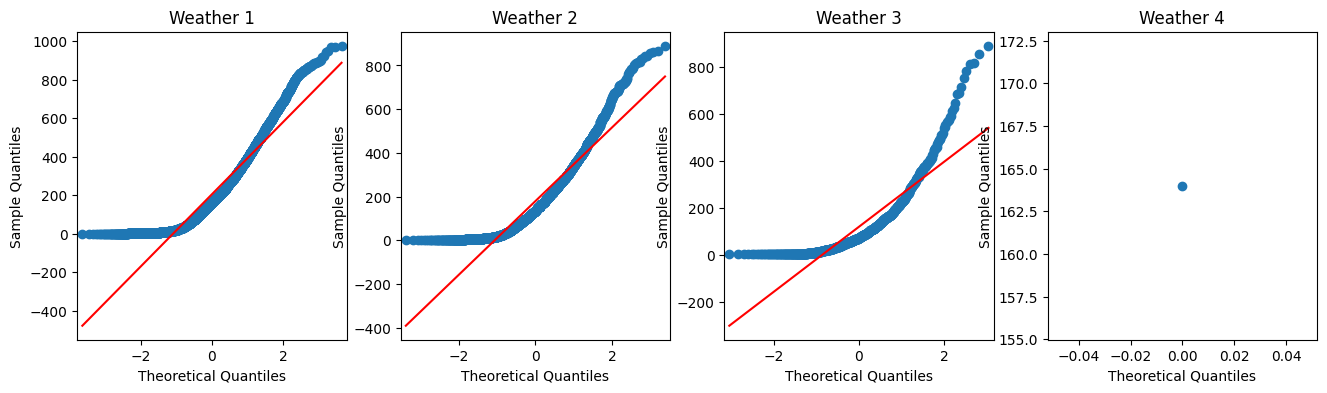

In [38]:
# Check Normality using Q-Q plots

groups_weather = [gp1, gp2, gp3, gp4]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, group in enumerate(groups_weather):
    sm.qqplot(group, line='s', ax=axes[i])
    axes[i].set_title(f'Weather {i+1}')


In [39]:
from scipy.stats import kruskal

# Groups for Weather
gp1 = df[df['weather'] == 1]['count'].values
gp2 = df[df['weather'] == 2]['count'].values
gp3 = df[df['weather'] == 3]['count'].values
gp4 = df[df['weather'] == 4]['count'].values

# Kruskal-Wallis Test for Weather
kruskal_weather_stat, kruskal_weather_p_value = kruskal(gp1, gp2, gp3, gp4)
print(f"Kruskal-Wallis Test for Weather: stat={kruskal_weather_stat:.3f}, p={kruskal_weather_p_value:.3e}")

# Interpretation
if kruskal_weather_p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of cycles rented across different weather conditions.")


Kruskal-Wallis Test for Weather: stat=205.002, p=3.502e-44
Reject the null hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.


In [44]:
#Check Homogeneity of Variances:

from scipy.stats import levene

# Levene's test
stat, p = levene(df['count'][df['weather'] == 1],
                 df['count'][df['weather'] == 2],
                 df['count'][df['weather'] == 3],
                 df['count'][df['weather'] == 4])
print('Levene’s Test: Statistics=%.3f, p=%.3f' % (stat, p))


Levene’s Test: Statistics=54.851, p=0.000


Null Hypothesis (H0): The variances are equal across different weather.

Alternative Hypothesis (H1): The variances are not equal across different weather.

Given the p-value is 0.000, which is less than the significance level of 0.05, we reject the null hypothesis. This indicates that the variances are not equal across different weather.

Since the assumption of equal variances is violated, using ANOVA would not be appropriate as it assumes equal variances. Instead, we should use a non-parametric test like the Kruskal-Wallis test, which does not assume equal variances or normality.


INSIGHT


For the Kruskal-Wallis test concerning number of cycles rented across different weather conditions :

The p-value is very close to zero.
Since the p-value is much smaller than the significance level of 0.05, we reject the null hypothesis.

Therefore, we conclude that there is a statistically significant difference in the number of electric cycles rented across different weather conditions.

In other words, the weather condition significantly affects the number of electric cycles rented, according to the ANOVA test.

## 3) Test for Differences in Number of Cycles Rented Across Seasons

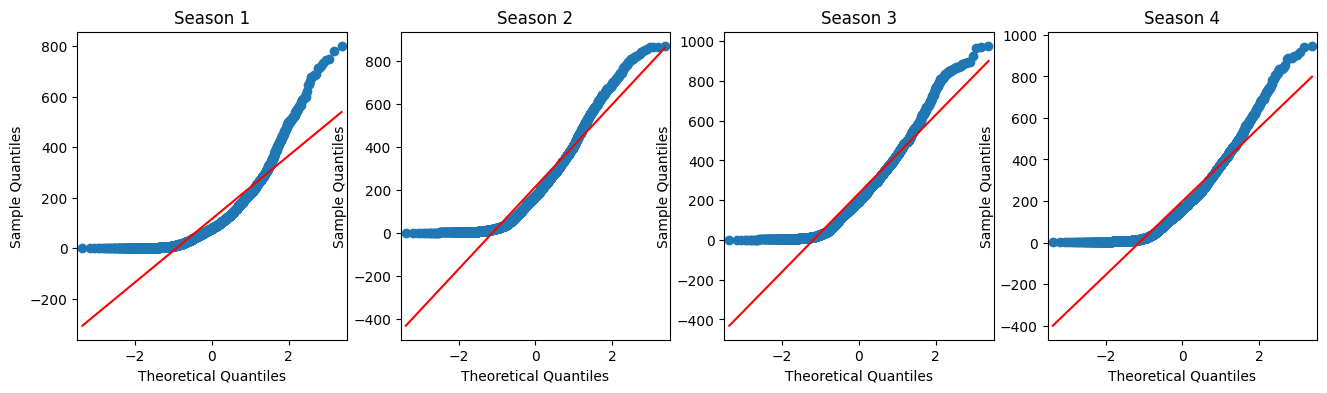

In [41]:
from statsmodels.graphics.gofplots import qqplot

# Define the data groups for the ANOVA
grp1 = df[df['season'] == 1]['count'].values
grp2 = df[df['season'] == 2]['count'].values
grp3 = df[df['season'] == 3]['count'].values
grp4 = df[df['season'] == 4]['count'].values

# Check Normality using Q-Q plots
groups = [grp1, grp2, grp3, grp4]


fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, group in enumerate(groups_season):
    sm.qqplot(group, line='s', ax=axes[i])
    axes[i].set_title(f'Season {i+1}')


In [42]:
from scipy.stats import shapiro

group_names = ['Season 1', 'Season 2', 'Season 3', 'Season 4']

# Perform Shapiro-Wilk test for each group
for i, group in enumerate(groups):
    if len(group) >= 3:
        stat, p = shapiro(group)
        print(f'{group_names[i]}: Shapiro-Wilk Test: stat={stat:.3f}, p={p:.3f}')
        if p > 0.05:
            print(f'{group_names[i]}: Sample looks Gaussian (fail to reject H0)')
        else:
            print(f'{group_names[i]}: Sample does not look Gaussian (reject H0)')
    else:
        print(f'{group_names[i]}: Not enough data to perform Shapiro-Wilk Test (less than 3 samples)')


Season 1: Shapiro-Wilk Test: stat=0.809, p=0.000
Season 1: Sample does not look Gaussian (reject H0)
Season 2: Shapiro-Wilk Test: stat=0.900, p=0.000
Season 2: Sample does not look Gaussian (reject H0)
Season 3: Shapiro-Wilk Test: stat=0.915, p=0.000
Season 3: Sample does not look Gaussian (reject H0)
Season 4: Shapiro-Wilk Test: stat=0.895, p=0.000
Season 4: Sample does not look Gaussian (reject H0)


In [43]:
#Check Homogeneity of Variances:

from scipy.stats import levene

# Levene's test
stat, p = levene(df['count'][df['season'] == 1],
                 df['count'][df['season'] == 2],
                 df['count'][df['season'] == 3],
                 df['count'][df['season'] == 4])
print('Levene’s Test: Statistics=%.3f, p=%.3f' % (stat, p))


Levene’s Test: Statistics=187.771, p=0.000


Null Hypothesis (H0): The variances are equal across different seasons.

Alternative Hypothesis (H1): The variances are not equal across different seasons.

Given the p-value is 0.000, which is less than the significance level of 0.05, we reject the null hypothesis. This indicates that the variances are not equal across different seasons.

Since the assumption of equal variances is violated, using ANOVA would not be appropriate as it assumes equal variances. Instead, we should use a non-parametric test like the Kruskal-Wallis test, which does not assume equal variances or normality.


#4) Test for Dependency of Weather on Season
Chi-Square Test

The Chi-Square Test is used to determine if there is a significant association between two categorical variables. We will check if weather is dependent on the season.

Null Hypothesis (𝐻0):
Weather is independent of the season.

Alternative Hypothesis (𝐻1):
Weather is dependent on the season.

In [21]:
# Create a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square statistic: {chi2}, P-value: {p}, Degrees of freedom: {dof}')

Chi-Square statistic: 49.15865559689363, P-value: 1.5499250736864862e-07, Degrees of freedom: 9


INSIGHT

Since the p-value is much smaller than the significance level of 0.05, we reject the null hypothesis. Therefore, we conclude that there is a statistically significant association between weather and season.

In other words, weather is dependent on the season, according to the Chi-Square test.